In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
meas = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [44]:
#meas into df
meas_cols = meas.__table__.columns.keys()
print(meas_cols)

meas_query = session.query(
    meas.id, meas.station, meas.date, meas.prcp, meas.tobs)

meas_df = pd.DataFrame(data=meas_query, columns=meas_cols)

meas_df

#station into df

sta_cols = station.__table__.columns.keys()
print(sta_cols)

sta_query = session.query(
    station.id, station.station, station.name, station.latitude, station.longitude, station.elevation)

station_df = pd.DataFrame(data=sta_query, columns=sta_cols)

station_df



['id', 'station', 'date', 'prcp', 'tobs']
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


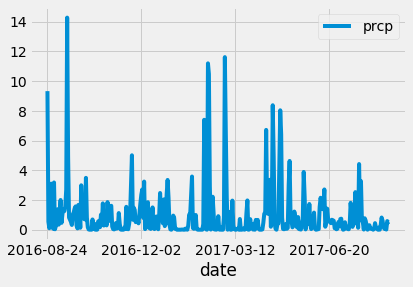

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# last_dt = dt.date(meas_df.date.iloc[-1])
# last_dt

last_year_prcp = session.query(meas.prcp, meas.date).\
    filter(meas.date > '2016-08-23').\
    order_by(meas.date).all()

df = pd.DataFrame(last_year_prcp, columns=['prcp', 'date']).groupby('date').sum()
df.plot.line()
# Calculate the date 1 year ago from the last data point in the database


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [29]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.prcp.describe()

count    365.000000
mean       0.974164
std        1.776466
min        0.000000
25%        0.050000
50%        0.400000
75%        1.080000
max       14.280000
Name: prcp, dtype: float64

In [45]:
# Design a query to show how many stations are available in this dataset?
meas_df.station.unique().size

9

In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df3 = meas_df.groupby('station').count().sort_values('id', ascending=False).reset_index()
top_station = df3.station.iloc[0]
print(f'top station {top_station}')
df3
      


top station USC00519281


,station,id,date,prcp,tobs
0,USC00519281,2772,2772,2772,2772
1,USC00519397,2724,2724,2685,2724
2,USC00513117,2709,2709,2696,2709
3,USC00519523,2669,2669,2572,2669
4,USC00516128,2612,2612,2484,2612
5,USC00514830,2202,2202,1937,2202
6,USC00511918,1979,1979,1932,1979
7,USC00517948,1372,1372,683,1372
8,USC00518838,511,511,342,511


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
filter = (meas_df.station == top_station)
df4 = meas_df[filter].sort_values('tobs')
lowest_temp = df4.tobs.iloc[0]
print(f'lowest temp: {lowest_temp}')
df4

lowest temp: 54.0


,id,station,date,prcp,tobs
13293,13294,USC00519281,2013-01-16,0.02,54.0
14410,14411,USC00519281,2016-02-08,0.00,56.0
14053,14054,USC00519281,2015-02-15,1.42,56.0
14079,14080,USC00519281,2015-03-13,0.06,56.0
14012,14013,USC00519281,2015-01-05,0.00,56.0
...,...,...,...,...,...
14952,14953,USC00519281,2017-08-06,0.00,83.0
14206,14207,USC00519281,2015-07-18,0.27,83.0
14255,14256,USC00519281,2015-09-05,0.00,83.0
14259,14260,USC00519281,2015-09-09,0.00,84.0


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

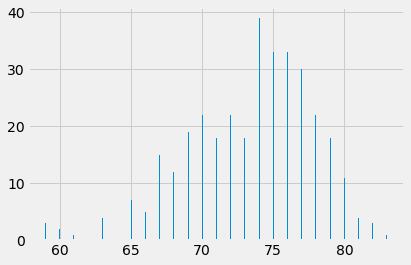

In [75]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

filter = (meas_df.date > '2016-08-23')
df5 = meas_df[filter]
filter = (df5.station == top_station)
df6 = df5[filter]
df7 = df6.groupby('date').sum().reset_index()
df7
x = df7.tobs
bins = 365

plt.hist(x, bins=bins)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
